# Feature Selection

Dataset Preview:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  

ANOVA F-test Scores:
sepal length (cm): 74.76
sepal width (cm): 33.42
petal length (cm): 713.46
petal width (cm): 526.54

Mutual Information Scores:
sepal length (cm): 0.43
sepal width (cm): 0.21
petal length (cm): 0.97
petal width (cm): 0.96

Performance on Original Features:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00     

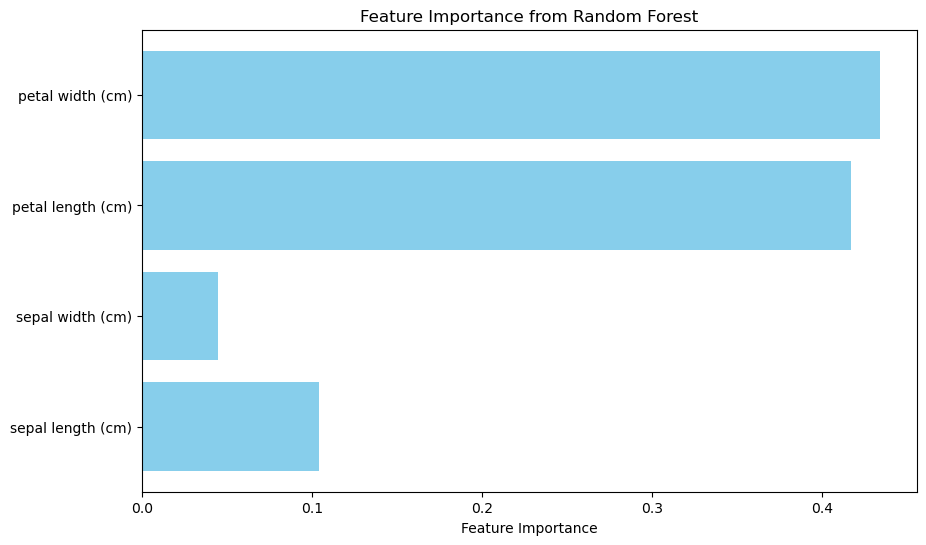

In [1]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data['target'] = iris.target

# Display the first few rows of the dataset
print("Dataset Preview:")
print(data.head())

# Split the data into features and target
X = data[iris.feature_names]
y = data['target']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature Selection using ANOVA F-test
f_selector = SelectKBest(score_func=f_classif, k=2)
X_train_f_selected = f_selector.fit_transform(X_train, y_train)
X_test_f_selected = f_selector.transform(X_test)

# Display selected features and scores
print("\nANOVA F-test Scores:")
for feature, score in zip(iris.feature_names, f_selector.scores_):
    print(f"{feature}: {score:.2f}")

# Feature Selection using Mutual Information
mi_selector = SelectKBest(score_func=mutual_info_classif, k=2)
X_train_mi_selected = mi_selector.fit_transform(X_train, y_train)
X_test_mi_selected = mi_selector.transform(X_test)

# Display mutual information scores
print("\nMutual Information Scores:")
for feature, score in zip(iris.feature_names, mi_selector.scores_):
    print(f"{feature}: {score:.2f}")

# Train and evaluate a Random Forest model on original and selected features
rf_original = RandomForestClassifier(random_state=42)
rf_original.fit(X_train, y_train)
y_pred_original = rf_original.predict(X_test)

rf_f_selected = RandomForestClassifier(random_state=42)
rf_f_selected.fit(X_train_f_selected, y_train)
y_pred_f_selected = rf_f_selected.predict(X_test_f_selected)

rf_mi_selected = RandomForestClassifier(random_state=42)
rf_mi_selected.fit(X_train_mi_selected, y_train)
y_pred_mi_selected = rf_mi_selected.predict(X_test_mi_selected)

# Evaluate the performance
print("\nPerformance on Original Features:")
print(classification_report(y_test, y_pred_original))

print("\nPerformance on ANOVA F-test Selected Features:")
print(classification_report(y_test, y_pred_f_selected))

print("\nPerformance on Mutual Information Selected Features:")
print(classification_report(y_test, y_pred_mi_selected))

# Plot feature importance from Random Forest trained on original features
plt.figure(figsize=(10, 6))
plt.barh(iris.feature_names, rf_original.feature_importances_, color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importance from Random Forest')
plt.show()


Dataset Preview:
   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  tar

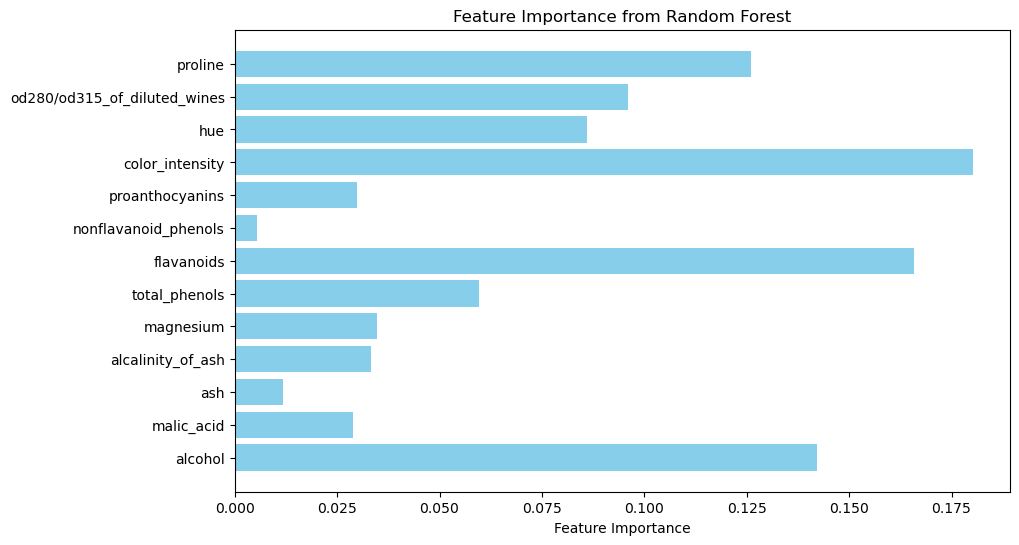

In [3]:
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

# Load the Wine dataset
wine = load_wine()
data = pd.DataFrame(wine.data, columns=wine.feature_names)
data['target'] = wine.target

# Display the first few rows of the dataset
print("Dataset Preview:")
print(data.head())

# Split the data into features and target
X = data[wine.feature_names]
y = data['target']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature Selection using ANOVA F-test
f_selector = SelectKBest(score_func=f_classif, k=5)
X_train_f_selected = f_selector.fit_transform(X_train, y_train)
X_test_f_selected = f_selector.transform(X_test)

# Display selected features and scores
print("\nANOVA F-test Scores:")
for feature, score in zip(wine.feature_names, f_selector.scores_):
    print(f"{feature}: {score:.2f}")

# Feature Selection using Mutual Information
mi_selector = SelectKBest(score_func=mutual_info_classif, k=5)
X_train_mi_selected = mi_selector.fit_transform(X_train, y_train)
X_test_mi_selected = mi_selector.transform(X_test)

# Display mutual information scores
print("\nMutual Information Scores:")
for feature, score in zip(wine.feature_names, mi_selector.scores_):
    print(f"{feature}: {score:.2f}")

# Train and evaluate a Random Forest model on original and selected features
rf_original = RandomForestClassifier(random_state=42)
rf_original.fit(X_train, y_train)
y_pred_original = rf_original.predict(X_test)

rf_f_selected = RandomForestClassifier(random_state=42)
rf_f_selected.fit(X_train_f_selected, y_train)
y_pred_f_selected = rf_f_selected.predict(X_test_f_selected)

rf_mi_selected = RandomForestClassifier(random_state=42)
rf_mi_selected.fit(X_train_mi_selected, y_train)
y_pred_mi_selected = rf_mi_selected.predict(X_test_mi_selected)

# Evaluate the performance
print("\nPerformance on Original Features:")
print(classification_report(y_test, y_pred_original))

print("\nPerformance on ANOVA F-test Selected Features:")
print(classification_report(y_test, y_pred_f_selected))

print("\nPerformance on Mutual Information Selected Features:")
print(classification_report(y_test, y_pred_mi_selected))

# Plot feature importance from Random Forest trained on original features
plt.figure(figsize=(10, 6))
plt.barh(wine.feature_names, rf_original.feature_importances_, color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importance from Random Forest')
plt.show()


In [33]:
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import time

# Load the Diabetes dataset
diabetes = load_diabetes()
data = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
data['target'] = diabetes.target

# Display the first few rows of the dataset
print("Dataset Preview:")
print(data.head())

# Split the data into features and target
X = data[diabetes.feature_names]
y = data['target']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature Selection using F-test for Regression
f_selector = SelectKBest(score_func=f_regression, k=5)
X_train_f_selected = f_selector.fit_transform(X_train, y_train)
X_test_f_selected = f_selector.transform(X_test)
selected_features_f = [feature for feature, mask in zip(diabetes.feature_names, f_selector.get_support()) if mask]

# Feature Selection using Mutual Information for Regression
mi_selector = SelectKBest(score_func=mutual_info_regression, k=5)
X_train_mi_selected = mi_selector.fit_transform(X_train, y_train)
X_test_mi_selected = mi_selector.transform(X_test)
selected_features_mi = [feature for feature, mask in zip(diabetes.feature_names, mi_selector.get_support()) if mask]

# Train and evaluate Linear Regression on original features
start_time = time.time()
lr_original = LinearRegression()
lr_original.fit(X_train, y_train)
y_pred_original = lr_original.predict(X_test)
time_original = time.time() - start_time

# Train and evaluate Linear Regression on F-test-selected features
start_time = time.time()
lr_f_selected = LinearRegression()
lr_f_selected.fit(X_train_f_selected, y_train)
y_pred_f_selected = lr_f_selected.predict(X_test_f_selected)
time_f_selected = time.time() - start_time

# Train and evaluate Linear Regression on Mutual Information-selected features
start_time = time.time()
lr_mi_selected = LinearRegression()
lr_mi_selected.fit(X_train_mi_selected, y_train)
y_pred_mi_selected = lr_mi_selected.predict(X_test_mi_selected)
time_mi_selected = time.time() - start_time

# Display Selected Features and Scores
print("\nF-test Selected Features and Scores:")
for feature, score in zip(diabetes.feature_names, f_selector.scores_):
    print(f"{feature}: {score:.2f}")
print(f"Number of Features Selected (F-test): {len(selected_features_f)}")
print(f"Selected Features (F-test): {selected_features_f}")

print("\nMutual Information Selected Features and Scores:")
for feature, score in zip(diabetes.feature_names, mi_selector.scores_):
    print(f"{feature}: {score:.2f}")
print(f"Number of Features Selected (Mutual Information): {len(selected_features_mi)}")
print(f"Selected Features (Mutual Information): {selected_features_mi}")

# Evaluate the performance
print("\nPerformance on Original Features:")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_original):.2f}")
print(f"R^2 Score: {r2_score(y_test, y_pred_original):.2f}")
print(f"Training Time: {time_original:.4f} seconds")

print("\nPerformance on F-test Selected Features:")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_f_selected):.2f}")
print(f"R^2 Score: {r2_score(y_test, y_pred_f_selected):.2f}")
print(f"Training Time: {time_f_selected:.4f} seconds")

print("\nPerformance on Mutual Information Selected Features:")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_mi_selected):.2f}")
print(f"R^2 Score: {r2_score(y_test, y_pred_mi_selected):.2f}")
print(f"Training Time: {time_mi_selected:.4f} seconds")



Dataset Preview:
        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  

F-test Selected Features and Scores:
age: 11.60
sex: 0.00
bmi: 177.05
bp: 76.56
s1: 11.10
s2: 7.94
s3: 59.22
s4: 69.61
s5: 115.52
s6: 52.80
Number of Features Selected (F-test): 5
Selected Features (F-test): ['bmi', 'bp', 's3', 's4', 's5']

Mutual Information Selected Features a

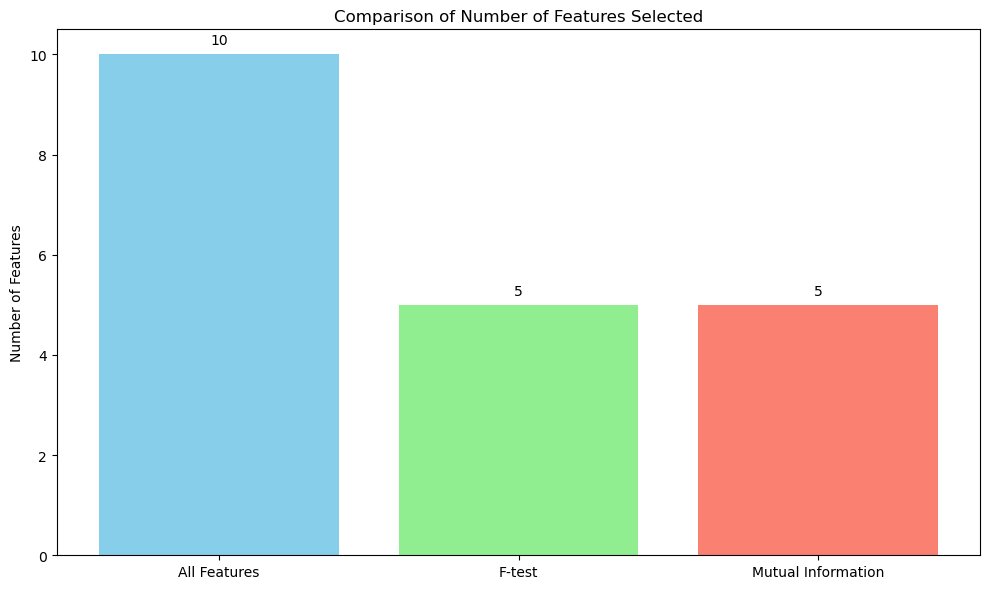

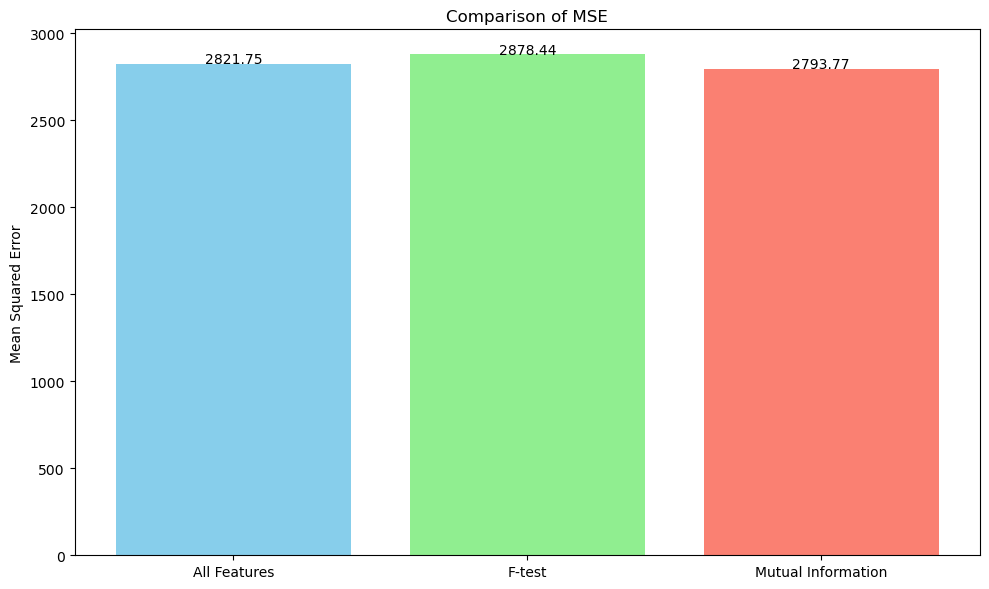

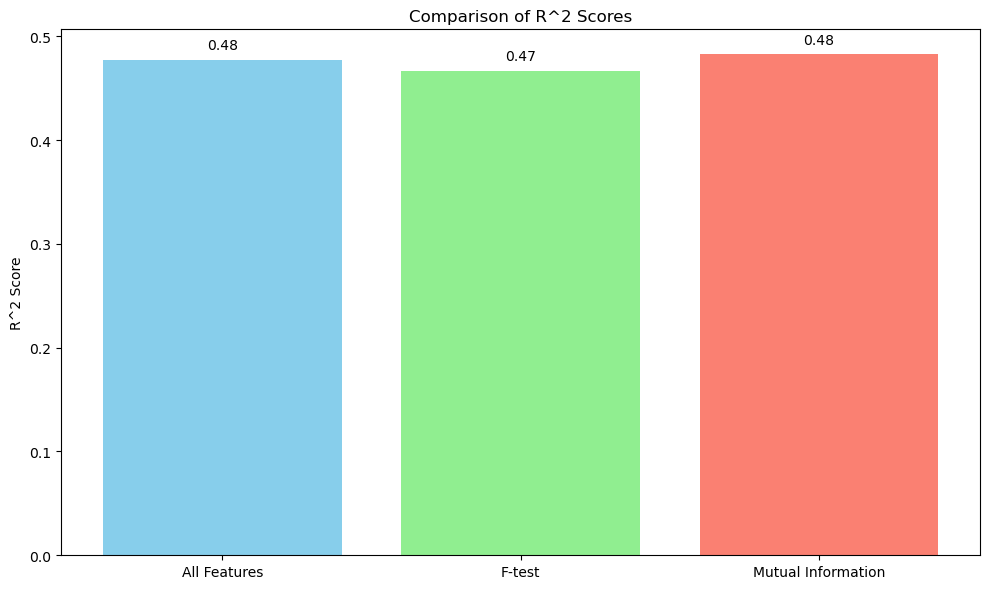

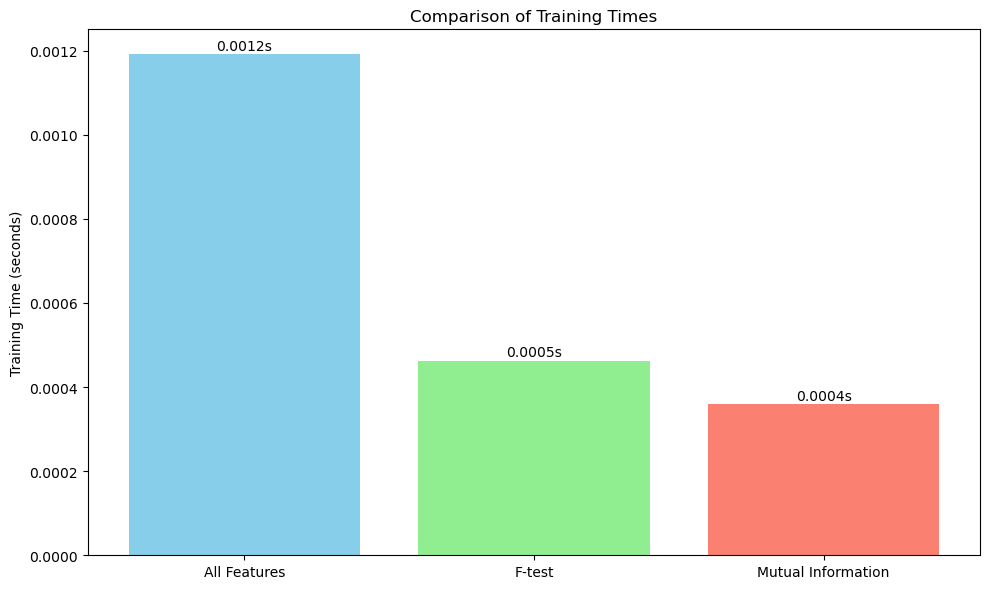

In [40]:
import matplotlib.pyplot as plt

# Data for bar plots
categories = ["All Features", "F-test", "Mutual Information"]
num_features = [X.shape[1], len(selected_features_f), len(selected_features_mi)]
mse_values = [
    mean_squared_error(y_test, y_pred_original),
    mean_squared_error(y_test, y_pred_f_selected),
    mean_squared_error(y_test, y_pred_mi_selected),
]
r2_values = [
    r2_score(y_test, y_pred_original),
    r2_score(y_test, y_pred_f_selected),
    r2_score(y_test, y_pred_mi_selected),
]
training_times = [time_original, time_f_selected, time_mi_selected]

# Plotting the number of selected features
plt.figure(figsize=(10, 6))
plt.bar(categories, num_features, color=['skyblue', 'lightgreen', 'salmon'])
plt.ylabel("Number of Features")
plt.title("Comparison of Number of Features Selected")
for i, value in enumerate(num_features):
    plt.text(i, value + 0.2, str(value), ha='center', fontsize=10)
plt.tight_layout()
plt.show()

# Plotting the MSE values
plt.figure(figsize=(10, 6))
plt.bar(categories, mse_values, color=['skyblue', 'lightgreen', 'salmon'])
plt.ylabel("Mean Squared Error")
plt.title("Comparison of MSE")
for i, value in enumerate(mse_values):
    plt.text(i, value + 5, f"{value:.2f}", ha='center', fontsize=10)
plt.tight_layout()
plt.show()

# Plotting the R^2 values
plt.figure(figsize=(10, 6))
plt.bar(categories, r2_values, color=['skyblue', 'lightgreen', 'salmon'])
plt.ylabel("R^2 Score")
plt.title("Comparison of R^2 Scores")
for i, value in enumerate(r2_values):
    plt.text(i, value + 0.01, f"{value:.2f}", ha='center', fontsize=10)
plt.tight_layout()
plt.show()

# Plotting the training times
plt.figure(figsize=(10, 6))
plt.bar(categories, training_times, color=['skyblue', 'lightgreen', 'salmon'])
plt.ylabel("Training Time (seconds)")
plt.title("Comparison of Training Times")
for i, value in enumerate(training_times):
    plt.text(i, value + 0.00001, f"{value:.4f}s", ha='center', fontsize=10)
plt.tight_layout()
plt.show()


# Feature Extraction

# PCA

Dataset Preview:
     0    1    2     3     4     5    6    7    8    9  ...   55   56   57  \
0  0.0  0.0  5.0  13.0   9.0   1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1  0.0  0.0  0.0  12.0  13.0   5.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2  0.0  0.0  0.0   4.0  15.0  12.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3  0.0  0.0  7.0  15.0  13.0   1.0  0.0  0.0  0.0  8.0  ...  0.0  0.0  0.0   
4  0.0  0.0  0.0   1.0  11.0   0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

    58    59    60    61   62   63  target  
0  6.0  13.0  10.0   0.0  0.0  0.0       0  
1  0.0  11.0  16.0  10.0  0.0  0.0       1  
2  0.0   3.0  11.0  16.0  9.0  0.0       2  
3  7.0  13.0  13.0   9.0  0.0  0.0       3  
4  0.0   2.0  16.0   4.0  0.0  0.0       4  

[5 rows x 65 columns]

Performance on Original Features:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        53
           1       0.96      1.00      0.98        50
           2       1.00

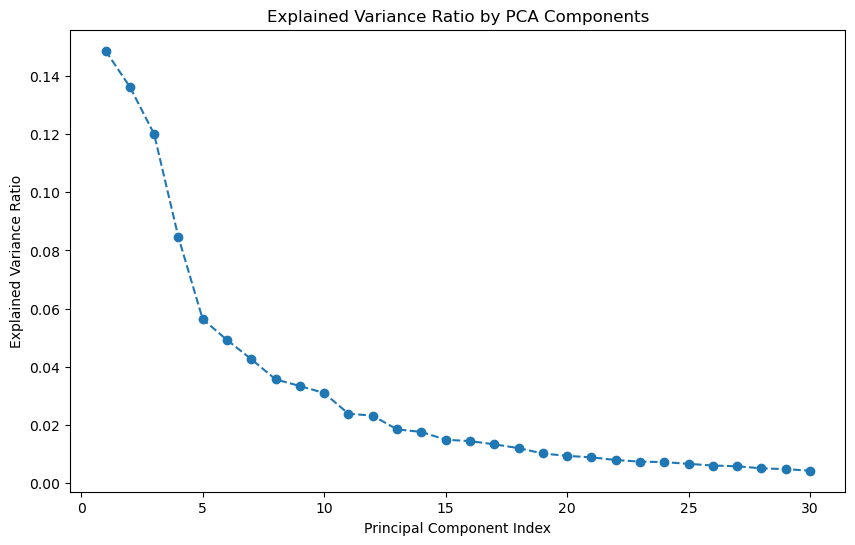

In [7]:
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

# Load the Digits dataset
digits = load_digits()
data = pd.DataFrame(digits.data)
data['target'] = digits.target

# Display the first few rows of the dataset
print("Dataset Preview:")
print(data.head())

# Split the data into features and target
X = data.drop('target', axis=1)
y = data['target']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train and evaluate a Random Forest model on the original features
rf_original = RandomForestClassifier(random_state=42)
rf_original.fit(X_train, y_train)
y_pred_original = rf_original.predict(X_test)

print("\nPerformance on Original Features:")
print(classification_report(y_test, y_pred_original))

# Apply PCA for dimensionality reduction
pca = PCA(n_components=30)  # Reduce to 30 components
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train and evaluate a Random Forest model on PCA-transformed features
rf_pca = RandomForestClassifier(random_state=42)
rf_pca.fit(X_train_pca, y_train)
y_pred_pca = rf_pca.predict(X_test_pca)

print("\nPerformance on PCA-Transformed Features:")
print(classification_report(y_test, y_pred_pca))

# Compare accuracy
accuracy_original = accuracy_score(y_test, y_pred_original)
accuracy_pca = accuracy_score(y_test, y_pred_pca)

print(f"\nAccuracy on Original Features: {accuracy_original:.2f}")
print(f"Accuracy on PCA-Transformed Features: {accuracy_pca:.2f}")

# Visualize the explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.title('Explained Variance Ratio by PCA Components')
plt.xlabel('Principal Component Index')
plt.ylabel('Explained Variance Ratio')
plt.show()

With synthetic dataset

In [26]:
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import time

# Create a synthetic dataset with redundant features
X, y = make_classification(
    n_samples=2000, n_features=1000, n_informative=10, n_redundant=500, random_state=42
)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train and evaluate Random Forest without PCA
start_time = time.time()
rf_original = RandomForestClassifier(n_estimators=200, random_state=42)
rf_original.fit(X_train, y_train)
y_pred_original = rf_original.predict(X_test)
end_time = time.time()
time_without_pca = end_time - start_time

# Evaluate performance
accuracy_original = accuracy_score(y_test, y_pred_original)
print("\nPerformance WITHOUT PCA:")
print(f"Accuracy: {accuracy_original:.2f}")
print(f"Training and Inference Time: {time_without_pca:.2f} seconds")
print(classification_report(y_test, y_pred_original))

# Apply PCA for dimensionality reduction
pca = PCA(n_components=20)  # Reduce to 20 components
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train and evaluate Random Forest with PCA
start_time = time.time()
rf_pca = RandomForestClassifier(n_estimators=200, random_state=42)
rf_pca.fit(X_train_pca, y_train)
y_pred_pca = rf_pca.predict(X_test_pca)
end_time = time.time()
time_with_pca = end_time - start_time

# Evaluate performance
accuracy_pca = accuracy_score(y_test, y_pred_pca)
print("\nPerformance WITH PCA:")
print(f"Accuracy: {accuracy_pca:.2f}")
print(f"Training and Inference Time: {time_with_pca:.2f} seconds")
print(classification_report(y_test, y_pred_pca))




Performance WITHOUT PCA:
Accuracy: 0.94
Training and Inference Time: 2.99 seconds
              precision    recall  f1-score   support

           0       0.94      0.93      0.94       304
           1       0.93      0.94      0.93       296

    accuracy                           0.94       600
   macro avg       0.93      0.94      0.93       600
weighted avg       0.94      0.94      0.94       600


Performance WITH PCA:
Accuracy: 0.94
Training and Inference Time: 0.51 seconds
              precision    recall  f1-score   support

           0       0.93      0.94      0.94       304
           1       0.94      0.93      0.94       296

    accuracy                           0.94       600
   macro avg       0.94      0.94      0.94       600
weighted avg       0.94      0.94      0.94       600



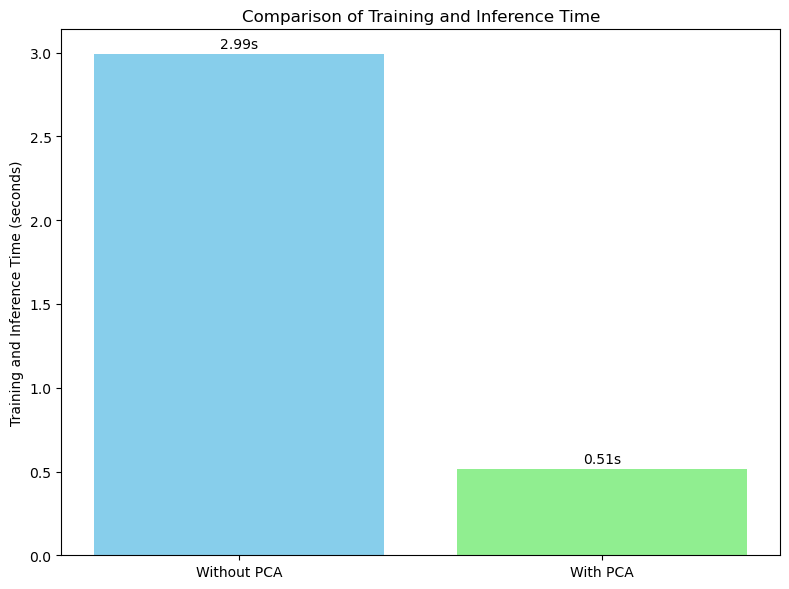

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Data for plotting
methods = ["Without PCA", "With PCA"]
times = [time_without_pca, time_with_pca]

# Plotting training and inference time
plt.figure(figsize=(8, 6))
plt.bar(methods, times, color=['skyblue', 'lightgreen'])
plt.ylabel("Training and Inference Time (seconds)")
plt.title("Comparison of Training and Inference Time")
plt.xticks(rotation=0)

# Annotating time values on top of the bars
for i, time in enumerate(times):
    plt.text(i, time + 0.02, f"{time:.2f}s", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


# Analysis of the Usefulness of PCA through results

**Accuracy:** Compare the model's accuracy with and without PCA.

**Training Time:** Highlight reduced training time with PCA due to fewer features.

**Cross-Validation Score:** Show if PCA reduces overfitting (higher CV score).

**Robustness to Noise:** Test if PCA improves performance on noisy data.

**Feature Reduction:** Show how PCA simplifies the dataset while retaining most of the variance.


In [31]:
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import numpy as np
import time

# Create a synthetic dataset with redundant features
X, y = make_classification(
    n_samples=2000, n_features=1000, n_informative=10, n_redundant=500, random_state=42
)

# Add noise to the dataset
np.random.seed(42)
X_noisy = X + np.random.normal(0, 0.1, X.shape)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train_noisy, X_test_noisy = train_test_split(X_noisy, test_size=0.3, random_state=42)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=20)  # Reduce to 20 components
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
X_train_pca_noisy = pca.fit_transform(X_train_noisy)
X_test_pca_noisy = pca.transform(X_test_noisy)

# Train and evaluate Random Forest without PCA
start_time = time.time()
rf_original = RandomForestClassifier(n_estimators=200, random_state=42)
rf_original.fit(X_train, y_train)
y_pred_original = rf_original.predict(X_test)
end_time = time.time()
time_without_pca = end_time - start_time

# Train and evaluate Random Forest with PCA
start_time = time.time()
rf_pca = RandomForestClassifier(n_estimators=200, random_state=42)
rf_pca.fit(X_train_pca, y_train)
y_pred_pca = rf_pca.predict(X_test_pca)
end_time = time.time()
time_with_pca = end_time - start_time

# Robustness Test (without PCA)
start_time = time.time()
rf_noisy_original = RandomForestClassifier(n_estimators=200, random_state=42)
rf_noisy_original.fit(X_train_noisy, y_train)
y_pred_noisy_original = rf_noisy_original.predict(X_test_noisy)
end_time = time.time()
time_noisy_without_pca = end_time - start_time

# Robustness Test (with PCA)
start_time = time.time()
rf_noisy_pca = RandomForestClassifier(n_estimators=200, random_state=42)
rf_noisy_pca.fit(X_train_pca_noisy, y_train)
y_pred_noisy_pca = rf_noisy_pca.predict(X_test_pca_noisy)
end_time = time.time()
time_noisy_with_pca = end_time - start_time

# Cross-validation scores
cv_original = np.mean(cross_val_score(rf_original, X, y, cv=5))
cv_pca = np.mean(cross_val_score(rf_pca, pca.fit_transform(X), y, cv=5))

# Print Results
print("\nPerformance WITHOUT PCA:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_original):.2f}")
print(f"Training Time: {time_without_pca:.2f} seconds")
print(f"Cross-Validation Score: {cv_original:.2f}")

print("\nPerformance WITH PCA:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_pca):.2f}")
print(f"Training Time: {time_with_pca:.2f} seconds")
print(f"Cross-Validation Score: {cv_pca:.2f}")

print("\nRobustness Test WITHOUT PCA (Noisy Data):")
print(f"Accuracy on Noisy Data: {accuracy_score(y_test, y_pred_noisy_original):.2f}")
print(f"Training Time: {time_noisy_without_pca:.2f} seconds")

print("\nRobustness Test WITH PCA (Noisy Data):")
print(f"Accuracy on Noisy Data: {accuracy_score(y_test, y_pred_noisy_pca):.2f}")
print(f"Training Time: {time_noisy_with_pca:.2f} seconds")

# Feature Count Comparison
print(f"\nOriginal Feature Count: {X.shape[1]}")
print(f"Reduced Feature Count (PCA): {pca.n_components_}")



Performance WITHOUT PCA:
Accuracy: 0.94
Training Time: 2.97 seconds
Cross-Validation Score: 0.94

Performance WITH PCA:
Accuracy: 0.93
Training Time: 0.43 seconds
Cross-Validation Score: 0.93

Robustness Test WITHOUT PCA (Noisy Data):
Accuracy on Noisy Data: 0.94
Training Time: 2.90 seconds

Robustness Test WITH PCA (Noisy Data):
Accuracy on Noisy Data: 0.94
Training Time: 0.43 seconds

Original Feature Count: 1000
Reduced Feature Count (PCA): 20
